# AML Project

## Finalize cleaning and EDA
* target encoding
* Box Cox transformation for label
* normalize values
* sampling (random split)
* google drive

## Read a dataset from google drive

In [1]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
final_spotify_data_cleaned = 'https://drive.google.com/file/d/1sfl8emc1NjjVd9TpuTHFdpUjJ-rCG_Jn/view?usp=share_link'

# link for fina_spotify_data
# link = 'https://drive.google.com/file/d/1djViZyjX3-kNZbsY_nf-xovKDioIGpBU/view?usp=share_link'  
 
# to get the id part of the file
id = final_spotify_data_cleaned.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('final_spotify_data_cleaned.csv') 

## EDA

In [4]:
import pandas as pd 

df = pd.read_csv('final_spotify_data_cleaned.csv')
print(df.shape)
df.head()

(676345, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,100,0.72100,0.585,242014.0,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,1.0,722.0,1McMsnEElThX1knmY4oliG,10.0,1.0,4.0,pop
1,96,0.02120,0.680,215627.0,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,184.0,1016.0,1Xyo4u8uXC1ZmMpatF05PJ,0.0,1.0,4.0,canadian contemporary r&b
2,96,0.00146,0.514,200040.0,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,184.0,1016.0,1Xyo4u8uXC1ZmMpatF05PJ,1.0,1.0,4.0,canadian contemporary r&b
3,95,0.22100,0.700,140526.0,0.722,0.000000,0.2720,-3.558,0.0369,90.989,0.756,0.0,890.0,6fWVd57NKTalqvmjRd2t8Z,7.0,0.0,4.0,cali rap
4,94,0.21300,0.662,161385.0,0.413,0.000000,0.1340,-7.357,0.0299,93.005,0.467,0.0,785.0,2tIP7SsRs7vjIcLrU85W8J,0.0,1.0,4.0,australian hip hop


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676345 entries, 0 to 676344
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   popularity               676345 non-null  int64  
 1   acousticness             676345 non-null  float64
 2   danceability             676345 non-null  float64
 3   duration_ms              676345 non-null  float64
 4   energy                   676345 non-null  float64
 5   instrumentalness         676345 non-null  float64
 6   liveness                 676345 non-null  float64
 7   loudness                 676345 non-null  float64
 8   speechiness              676345 non-null  float64
 9   tempo                    676345 non-null  float64
 10  valence                  676345 non-null  float64
 11  total_available_markets  676345 non-null  float64
 12  release_date             676345 non-null  float64
 13  topartist_id             676345 non-null  object 
 14  key 

In [6]:
df.isnull().sum()

popularity                      0
acousticness                    0
danceability                    0
duration_ms                     0
energy                          0
instrumentalness                0
liveness                        0
loudness                        0
speechiness                     0
tempo                           0
valence                         0
total_available_markets         0
release_date                    0
topartist_id                    0
key                             0
mode                            0
time_signature                  0
artist_genre               164869
dtype: int64

In [7]:
df = df[df['artist_genre'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511476 entries, 0 to 676344
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   popularity               511476 non-null  int64  
 1   acousticness             511476 non-null  float64
 2   danceability             511476 non-null  float64
 3   duration_ms              511476 non-null  float64
 4   energy                   511476 non-null  float64
 5   instrumentalness         511476 non-null  float64
 6   liveness                 511476 non-null  float64
 7   loudness                 511476 non-null  float64
 8   speechiness              511476 non-null  float64
 9   tempo                    511476 non-null  float64
 10  valence                  511476 non-null  float64
 11  total_available_markets  511476 non-null  float64
 12  release_date             511476 non-null  float64
 13  topartist_id             511476 non-null  object 
 14  key 

In [8]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from category_encoders import TargetEncoder

te = TargetEncoder(cols=["topartist_id", "artist_genre"]).fit(df, df['popularity'])
df_te = te.transform(df)

df_te.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,100,0.72100,0.585,242014.0,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,1.0,722.0,50.565249,10.0,1.0,4.0,54.474876
1,96,0.02120,0.680,215627.0,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,184.0,1016.0,59.817780,0.0,1.0,4.0,46.678300
2,96,0.00146,0.514,200040.0,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,184.0,1016.0,59.817780,1.0,1.0,4.0,46.678300
3,95,0.22100,0.700,140526.0,0.722,0.000000,0.2720,-3.558,0.0369,90.989,0.756,0.0,890.0,48.389971,7.0,0.0,4.0,35.031905
4,94,0.21300,0.662,161385.0,0.413,0.000000,0.1340,-7.357,0.0299,93.005,0.467,0.0,785.0,60.253468,0.0,1.0,4.0,50.576587


In [10]:
X = df_te.drop(columns=["popularity"])
y = df_te["popularity"]

<Axes: >

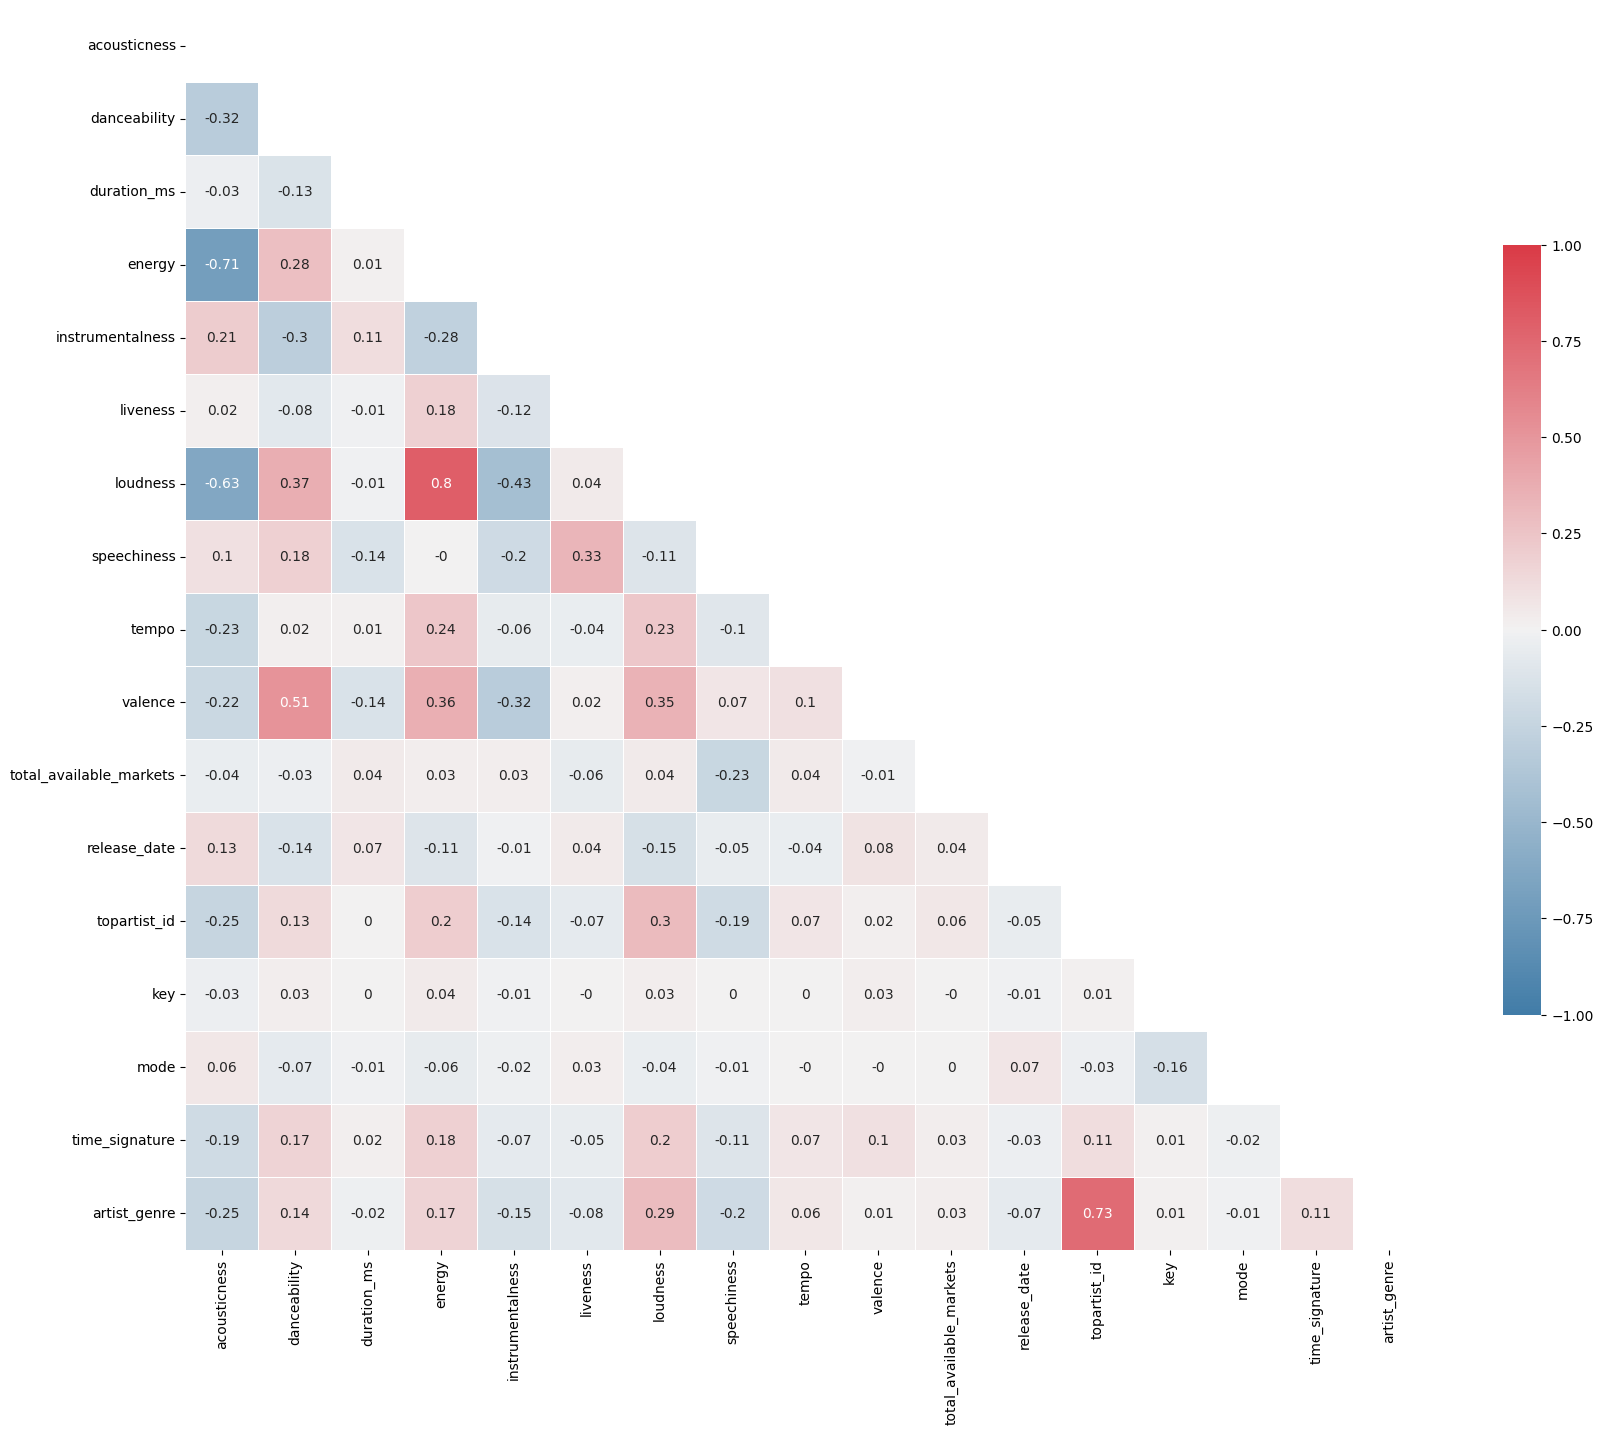

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True, n=20)
sns.heatmap(corr.round(2), mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [47]:
# loudness and energy are positivly correlated (>=0.8)
# remove energy

print(X.shape)
X = X.drop(columns=["energy"])
print(X.shape)

(511476, 17)
(511476, 16)


array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'total_available_markets'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'topartist_id'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'artist_genre'}>]], dtype=object)

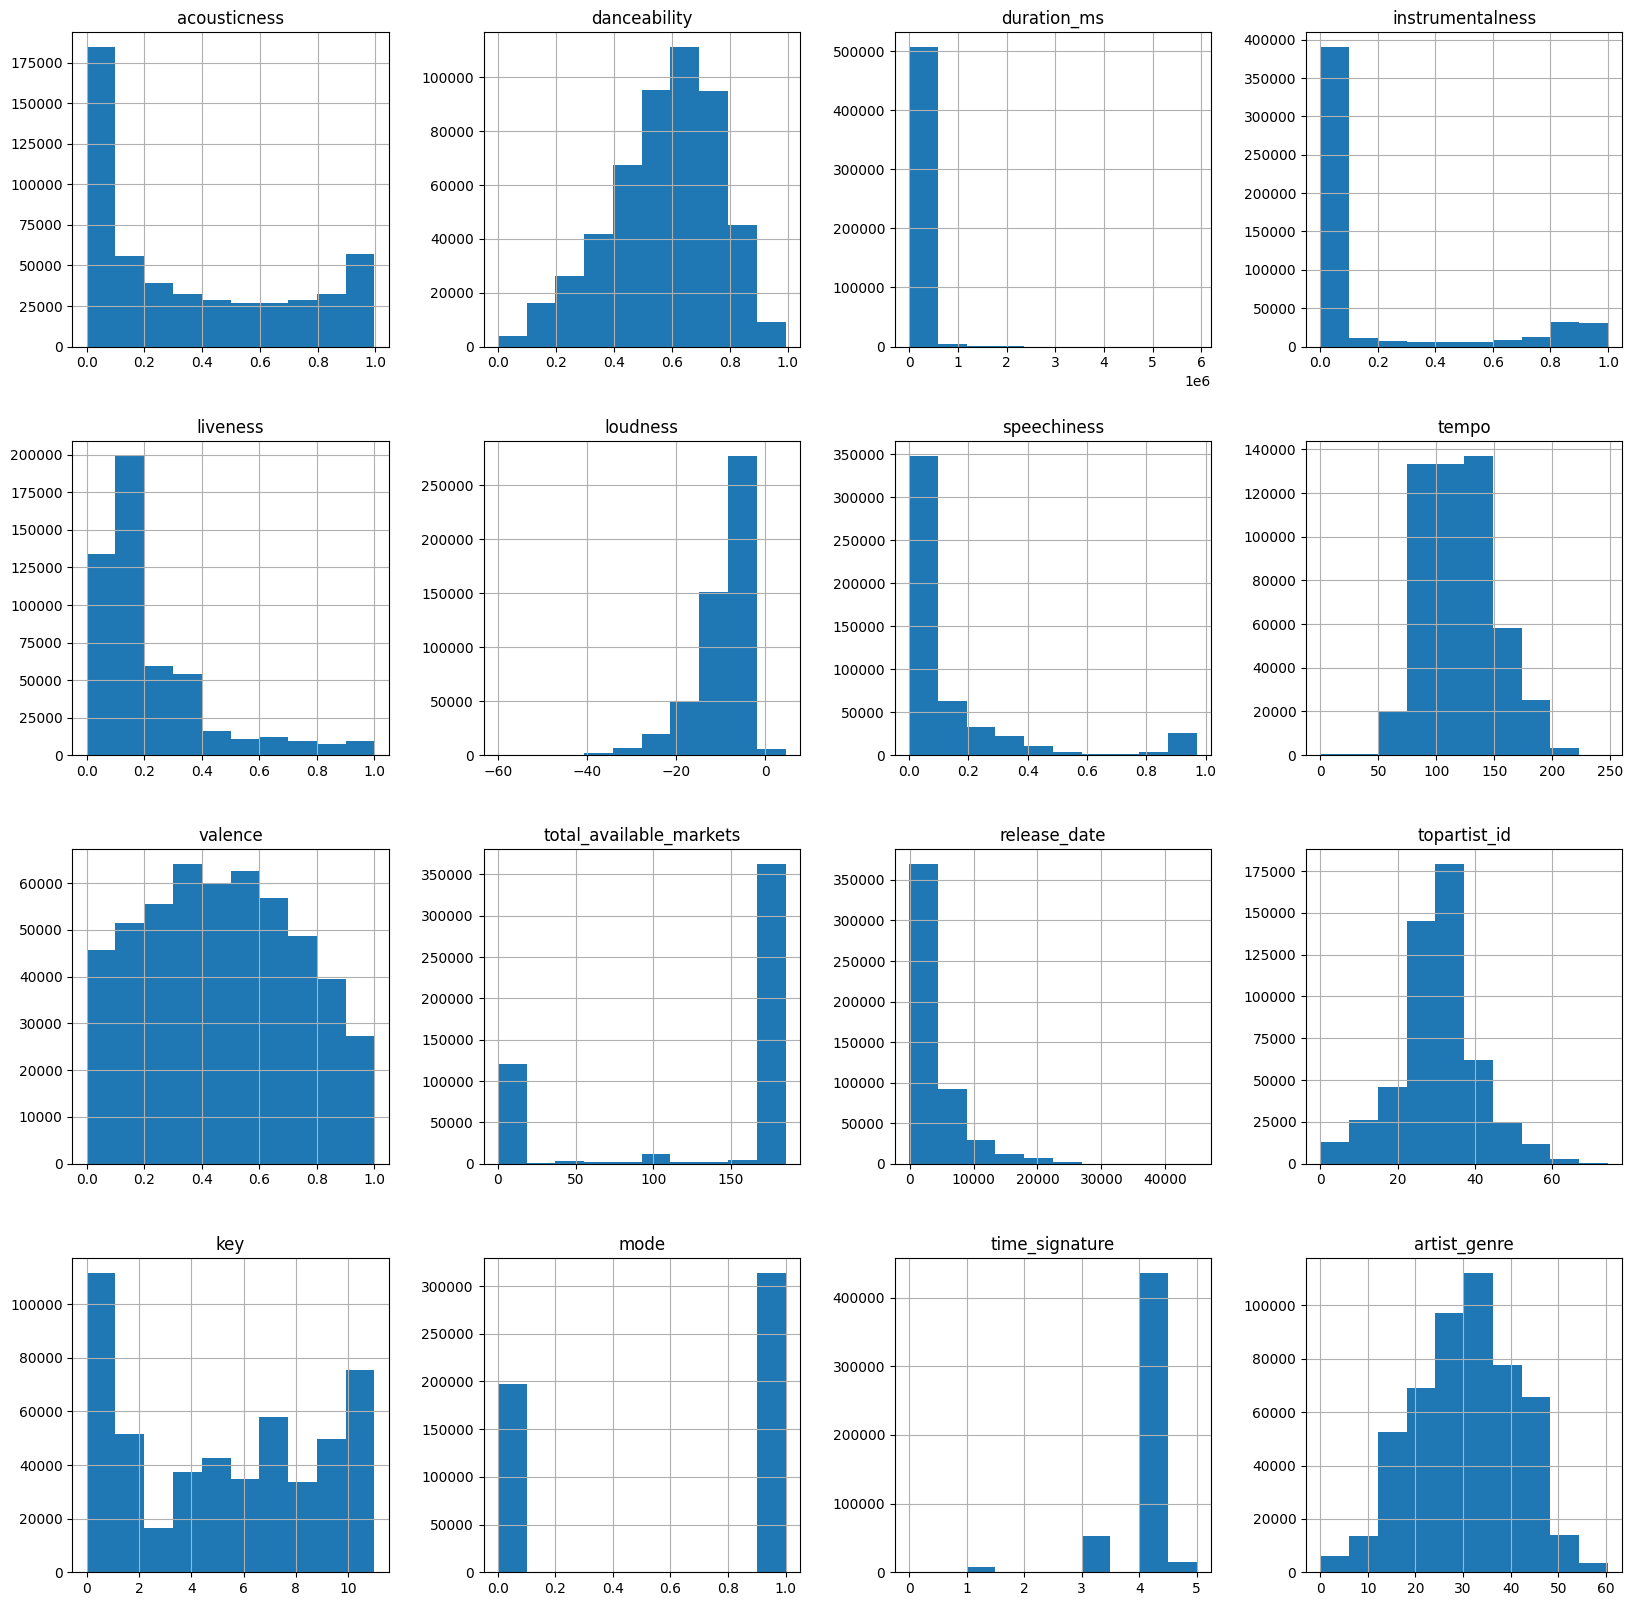

In [48]:
X[X.dtypes[(X.dtypes=="float64")|(X.dtypes=="int64")].index.values].hist(figsize=[20,20])

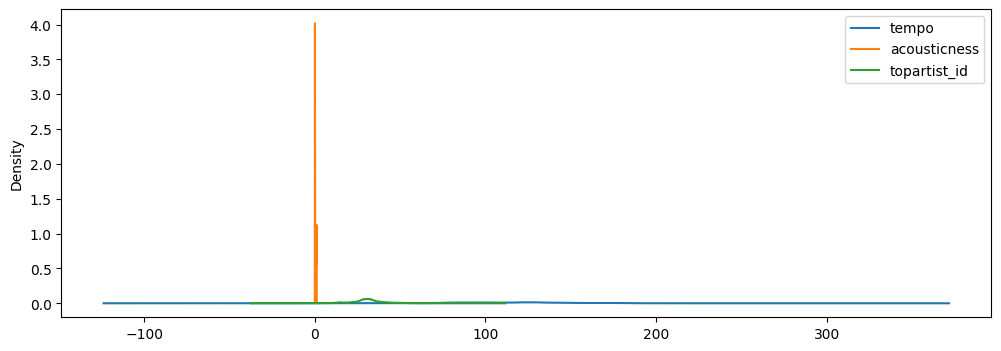

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))

X['tempo'].plot(kind='kde')
X['acousticness'].plot(kind='kde')
X['topartist_id'].plot(kind='kde')

ax.legend()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

col_names = X.columns
features = X[col_names]

#scaler = StandardScaler().fit(features.values)
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,0.723896,0.589718,0.040668,0.000013,0.1050,0.794009,0.061959,0.580521,0.132,0.005405,0.017536,0.678621,0.909091,1.0,0.8,0.900922
1,0.021285,0.685484,0.036197,0.000012,0.5430,0.844744,0.031856,0.476327,0.644,0.994595,0.024071,0.802819,0.000000,1.0,0.8,0.771959
2,0.001466,0.518145,0.033556,0.000095,0.0897,0.837817,0.061649,0.689993,0.334,0.994595,0.024071,0.802819,0.090909,1.0,0.8,0.771959
3,0.221888,0.705645,0.023471,0.000000,0.2720,0.874636,0.038041,0.367134,0.756,0.000000,0.021270,0.649422,0.636364,0.0,0.8,0.579316
4,0.213855,0.667339,0.027006,0.000000,0.1340,0.815766,0.030825,0.375268,0.467,0.000000,0.018937,0.808667,0.000000,1.0,0.8,0.836441


array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'total_available_markets'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'topartist_id'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'artist_genre'}>]], dtype=object)

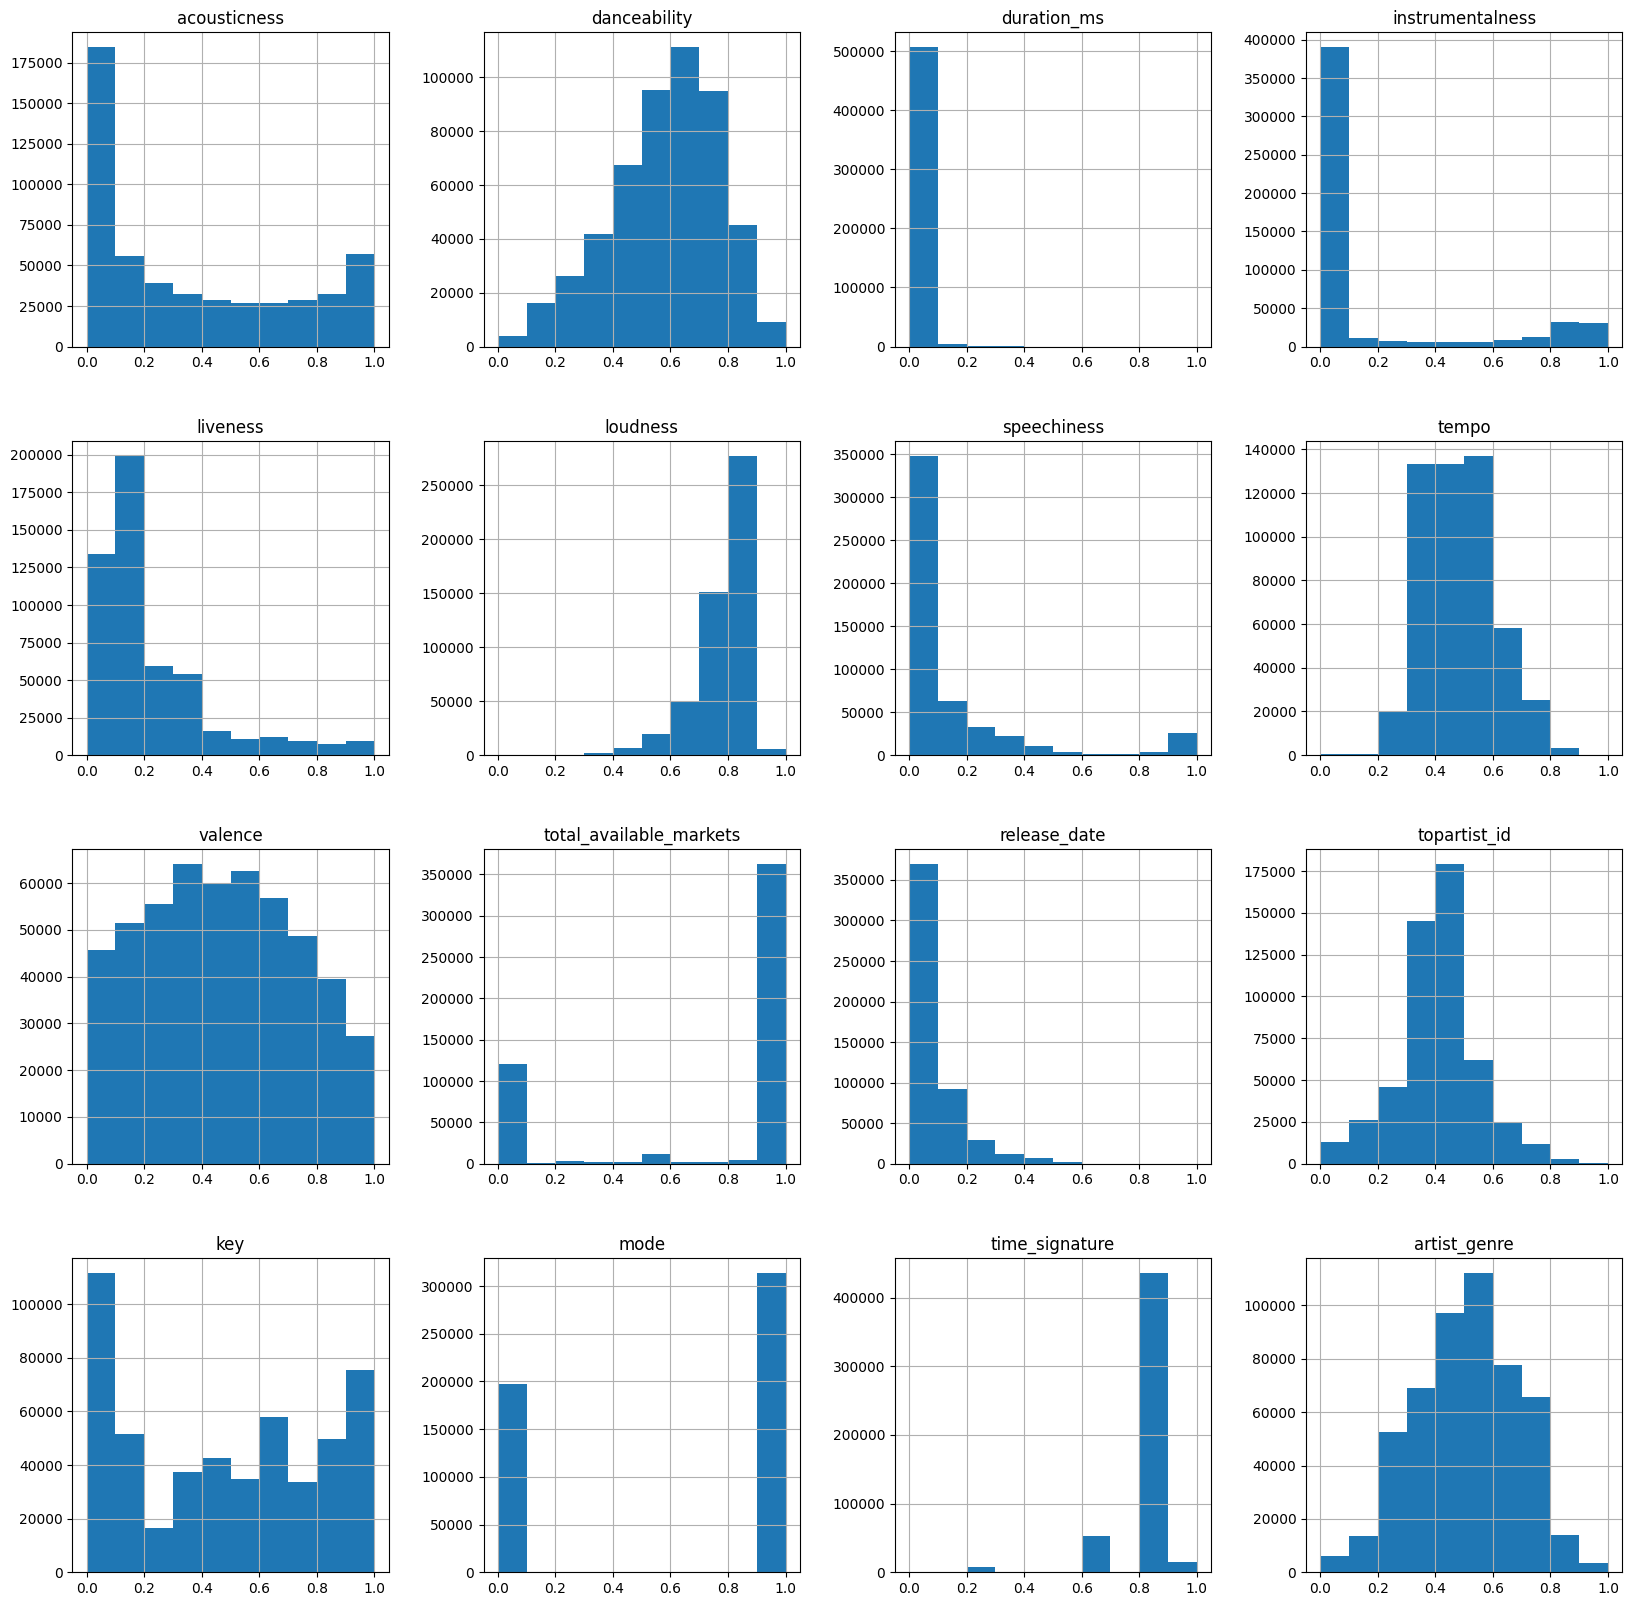

In [61]:
scaled_features[scaled_features.dtypes[(scaled_features.dtypes=="float64")|(scaled_features.dtypes=="int64")].index.values].hist(figsize=[20,20])

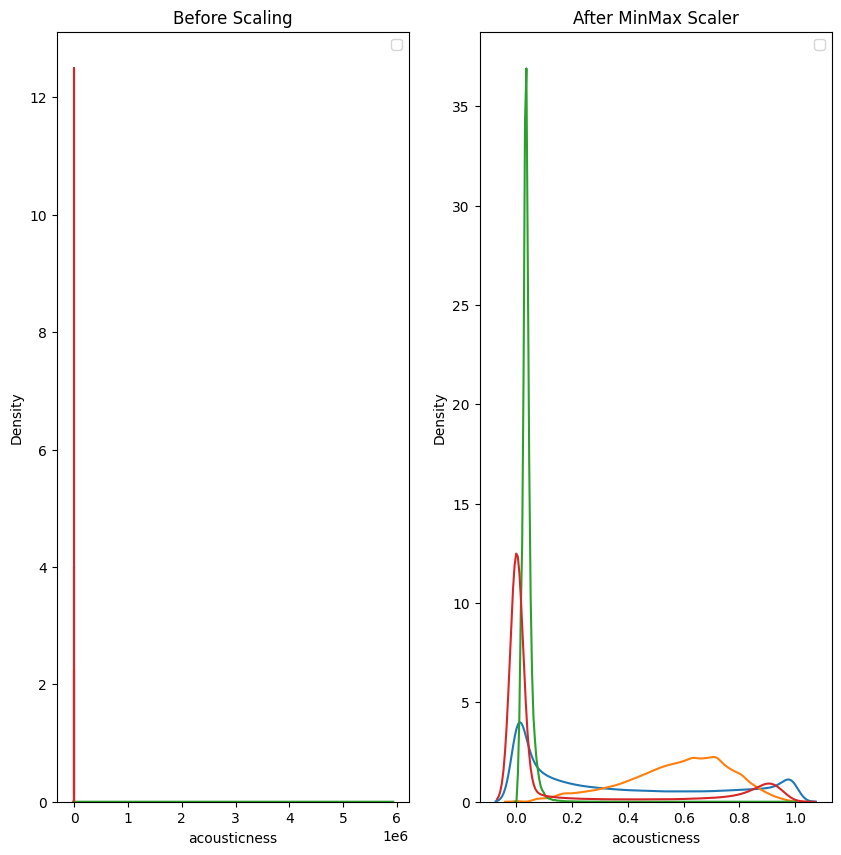

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(X['acousticness'], ax=ax1)
sns.kdeplot(X['danceability'], ax=ax1)
sns.kdeplot(X['duration_ms'], ax=ax1)
sns.kdeplot(X['instrumentalness'], ax=ax1)
ax1.legend()

ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_features['acousticness'], ax=ax2)
sns.kdeplot(scaled_features['danceability'], ax=ax2)
sns.kdeplot(scaled_features['duration_ms'], ax=ax2)
sns.kdeplot(scaled_features['instrumentalness'], ax=ax2)
ax2.legend()


plt.show()

In [16]:
from scipy import stats

_, p = stats.normaltest(y)
print(p)

0.0


In [21]:
y[y<=0]

380742    0
380743    0
380744    0
380745    0
380746    0
         ..
674425    0
674677    0
675532    0
675597    0
675832    0
Name: popularity, Length: 74548, dtype: int64

<ipython-input-25-2f40458a1d60>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y[y>0], hist = False, kde = True,
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-25-2f40458a1d60>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` 

Lambda value used for Transformation: 0.6176262227906656


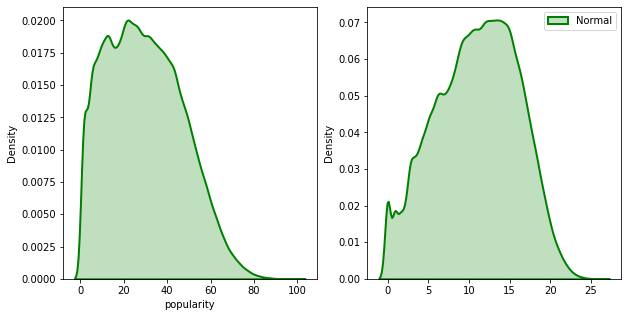

In [25]:
from scipy import stats
#y_bc, lambda_bc = stats.boxcox(y[y>0])

fitted_data, fitted_lambda = stats.boxcox(y[y>0])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(y[y>0], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [ ]:
# Rather than normal boxcox, you can use boxcox1p. It adds 1 to x so there won't be any "0" record

from scipy.special import boxcox1p
boxcox1p(y)